In [24]:
import pandas as pd
from matplotlib import pyplot as plt

from notebooks.analytics.utils import init_analysis, savefig
import seaborn as sns
from notebooks.analytics.utils import set_save_folder

In [25]:


fed_avg = init_analysis("fed_avg_13")
fed_avg["label"] = "FedAvg"
declust_3 = init_analysis(f"daeclust_16-clusters-selection")
declust_3["label"] = "CSL - tol 3"
declust_2 = init_analysis(f"daeclust_17_00-clusters-selection")
declust_2["label"] = "CSL - tol 2"
declust_1 = init_analysis(f"daeclust_18_00-clusters-selection")
declust_1["label"] = "CSL - tol 1"

set_save_folder("tolerance_analysis")
all_data = pd.concat([fed_avg, declust_3, declust_2, declust_1])

In [26]:
all_data_mean = all_data.groupby(["round_id", "trainer_id", "label"])["test_acc"].max().groupby(["round_id", "label"]).mean().reset_index()

In [27]:
all_data_mean

,round_id,label,test_acc
0,0.0,FedAvg,NaN
1,1.0,CSL - tol 1,0.686832
2,1.0,CSL - tol 2,0.690421
3,1.0,CSL - tol 3,0.658642
4,1.0,FedAvg,0.205368
...,...,...,...
401,101.0,CSL - tol 1,0.990558
402,101.0,CSL - tol 2,0.973495
403,101.0,CSL - tol 3,0.961137
404,101.0,FedAvg,0.965811


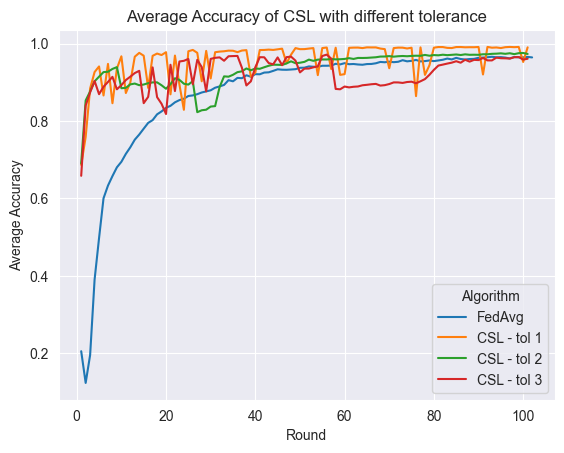

In [28]:
ax = sns.lineplot(all_data_mean, x="round_id", y="test_acc", hue="label")
plt.ylabel("Average Accuracy")
plt.xlabel("Round")
plt.title("Average Accuracy of CSL with different tolerance")
plt.legend(title="Algorithm")
savefig(plt, "avg_acc")

plt.show()